### Assignment:
Suppose you've ridden a bicycle from New York City to Key West, Florida. Your bicycle odometer shows the total miles, which you have dutifully logged at the end of each day with paper and pencil. Your first two entries might be 55 and 120, indicating that you rode your bike 55 miles on day 1 and 65 miles on day 2.
1. Your task is to create a pandas Series object that holds the cumulative miles at the end of each day.
2. Then use your Python skills to show the total miles that you rode each day.

### Trip Details:

1. According to Google Maps, a bicycle trip from New York City to Key West, Florida is roughly **1518** miles by bicycle.
<img src="gm_ny_to_kw.jpg" alt="Trip View" title="Google Map NY to KW" width="702" height="341" />


2. According to **Bicycle Touring Pro**, "the average individual conducting a long-distance bicycle tour will cycle **between 40 and 60 miles** each day".
> Alff, D. N.D. Bike Tour Planning: How Far Should You Plan To Cycle Each Day? *Bicycle Touring Pro*. Retrieved from https://bicycletouringpro.com/bike-tour-planning-how-far-should-you-plan-to-cycle-each-day/#:~:text=The%20average%20individual%20conducting%20a,recommended%20for%20most%2

### Specific Details:

1. In order to create an accurate simulation of the miles ridden each day, **a random miles generator will be used to select an INT betwen 40 and 60**.

2. During the random mile generation process, **a 15 mile grace amount will be used to determine if the rider goes over the  randomly generated mile amount**. This simulates a situation where the rider would want to complete the trip without leaving a low amount of miles for the next day.

3. A constant of **1518** will be used as the total trip miles.

#### Grace Amount Example:
> - The remaining miles left is 50 and the randomly generated mile equals 43. The remaining miles left would be 7. Instead of riding 7 miles the next day, since the remaining miles is 15 or less, the rider will complete the trip by riding the 50 miles even though 43 was generated.
> - The remaining miles left is 70 and the randomly generated mile equals 60. The remaining miles left would be 10. Instead of riding 10 miles the next day, the rider will complete the trip by riding the 70 miles even though 60 was generated.

### Python Code for Imports

In [1]:
# import call to random library to retrieve random int function
from random import randint

# matplotlib and panda standard imports
import matplotlib.pyplot as plt
import pandas as pd

# Enable inline plotting
%matplotlib inline

### Generate Miles Function

In [2]:
def generate_miles(remaining_miles):
    ''' Function that randomly generates the number of miles riden for the day and returns it to caller after
        checks are performed.
    
        Arguments:
            remaining_miles (int): The number of miles left between NY and Key West.
        
        Return:
            miles (int): The randomly generated number of miles ridden for the day.
            remaining_miles (int): The total miles left on the trip.
    '''
    
    # generate a random int between 40 and 60 miles
    miles = randint(40, 60)
  
    # if remaining miles is greater than generated miles and subtraction is greater than grace amount
    if (remaining_miles > miles) and (remaining_miles - miles) > 15:
        return miles
    
    # if remaining miles is greater than generated miles and subtraction is less than grace amount
    elif (remaining_miles > miles) and (remaining_miles - miles) <= 15:
        return remaining_miles
    
    # return remaining miles for every other case
    else:
        return remaining_miles

### Main Code To Generate Miles and Store in Lists

In [3]:
# constant used for the total miles to travel
total_miles = 1518

# variable to store value for how many mles completed
miles_completed = 0

# variable to store the day count, initialized to 1
day_count = 1

# lists to store miles and days for later use with pandas series objects
l_miles = []
l_days = []

# loop to generate miles riden each day
while miles_completed < total_miles:
    
    # call generator and pass in the results of total miles minus miles completed
    miles = generate_miles(total_miles - miles_completed)
   
    # update lists
    l_miles.append(miles)
    l_days.append(f'Day {day_count}')
    
    # update day count and miles completed values
    day_count += 1
    miles_completed += miles

### Pandas Code - Building Series Objects from the Populated Lists

In [4]:
# pandas series object storing the daily miles riden each day
daily_log = pd.Series(l_miles, index = l_days)

# pandas series object simulating the odometer readings at the end of each day
odometer = daily_log.cumsum()

### Viewing the Cumulative Miles at the End of Each Day

In [5]:
print(odometer)

Day 1       52
Day 2       92
Day 3      149
Day 4      202
Day 5      253
Day 6      302
Day 7      343
Day 8      391
Day 9      432
Day 10     481
Day 11     526
Day 12     584
Day 13     642
Day 14     689
Day 15     744
Day 16     804
Day 17     861
Day 18     921
Day 19     968
Day 20    1012
Day 21    1057
Day 22    1112
Day 23    1172
Day 24    1231
Day 25    1284
Day 26    1334
Day 27    1394
Day 28    1438
Day 29    1495
Day 30    1518
dtype: int64


### Viewing the Total Miles Riden Each Day

In [6]:
print(daily_log)

Day 1     52
Day 2     40
Day 3     57
Day 4     53
Day 5     51
Day 6     49
Day 7     41
Day 8     48
Day 9     41
Day 10    49
Day 11    45
Day 12    58
Day 13    58
Day 14    47
Day 15    55
Day 16    60
Day 17    57
Day 18    60
Day 19    47
Day 20    44
Day 21    45
Day 22    55
Day 23    60
Day 24    59
Day 25    53
Day 26    50
Day 27    60
Day 28    44
Day 29    57
Day 30    23
dtype: int64


### Visualizing the Total Miles Ridden Each 

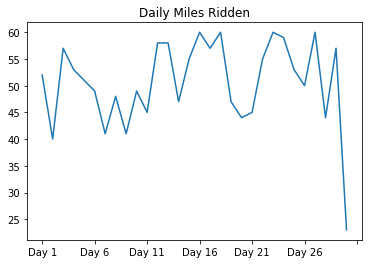

In [7]:
daily_log.plot(title='Daily Miles Ridden');